# Music Dataset Exploratory Analysis
### Author: Ben Funk
### 2025-05-07


## 1. Data Loading and Initial Exploration

For this project I have decided to go with a data set I really liked to work with in the past. A spotify song attribute dataset. While I have trained many ML models on this data I have not done a visual deep dive, making this the perfect chance to better understand how the data looks and what relationships might present themselves though the visual medium.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set the style for our visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


As we can see there are quite a few columns, with a good mix of numerical and categorical columns. next we need to check the types in order to determine the best way to start this visual analysis.

In [2]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Check data types
df.info()


Dataset shape: (114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
artists       1
album_name    1
track_name    1
dtype: int64


One other thing about this dataset is the fact that a popularity of 0 is used as a catch all and as such those values will need to be removes as they cause a lot of noise within the data.

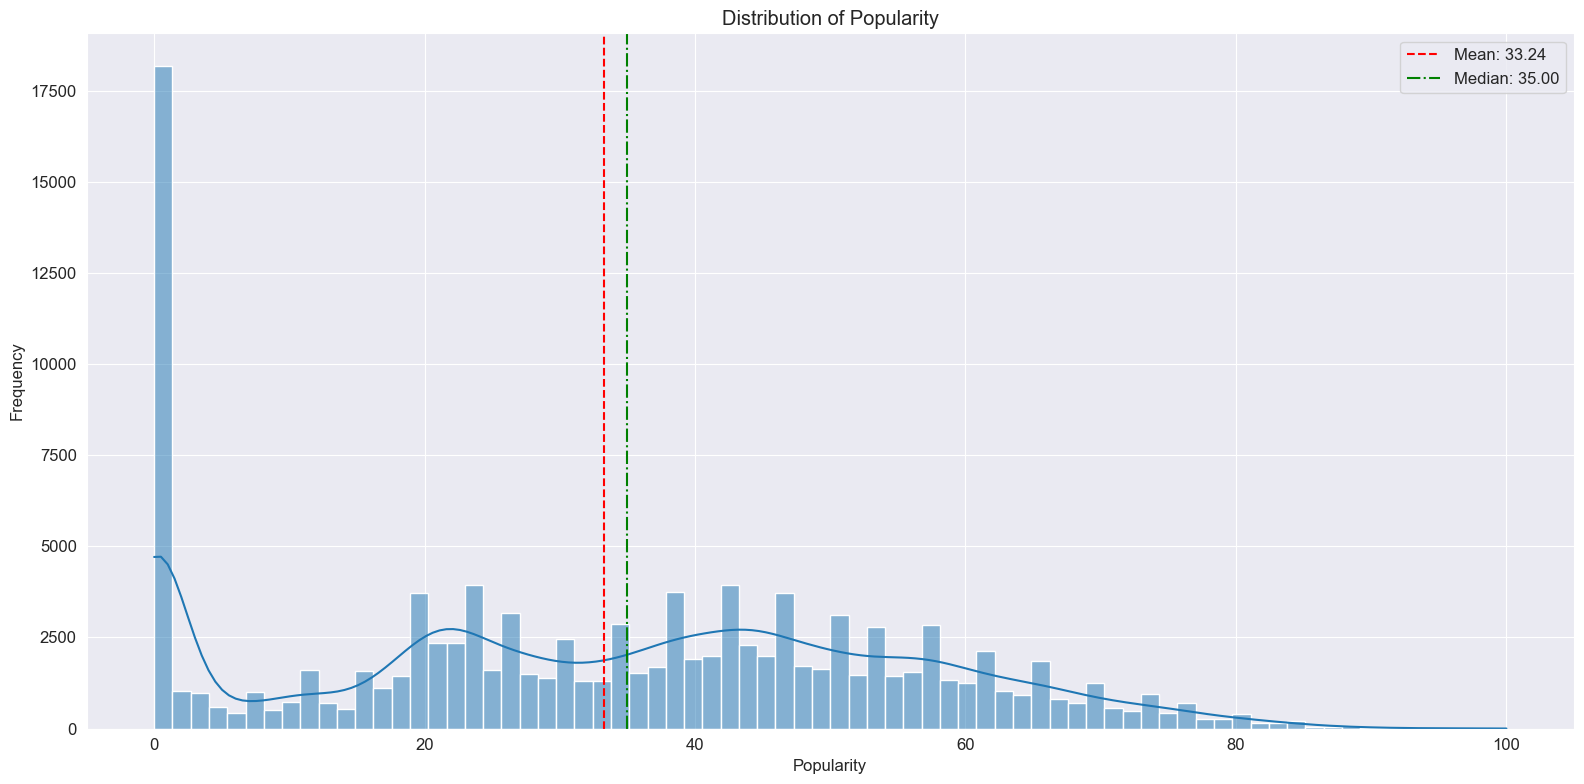

In [8]:
# --- Distribution of the target variable: Popularity -------------------------
feature = "popularity"

fig, ax = plt.subplots(figsize=(16, 8))

sns.histplot(df[feature], kde=True, ax=ax)
ax.set_title(f"Distribution of {feature.capitalize()}")
ax.set_xlabel(feature.capitalize())
ax.set_ylabel("Frequency")

# Add mean and median reference lines
mean_val = df[feature].mean()
median_val = df[feature].median()

ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.2f}")
ax.axvline(median_val, color="green", linestyle="-.", label=f"Median: {median_val:.2f}")
ax.legend()

plt.tight_layout()
plt.show()

In [4]:
# Get summary statistics for numerical columns
print("Before:", df.shape)
df = df[df['popularity'] != 0]
print("After:", df.shape)


Before: (114000, 21)
After: (97980, 21)


## 2. Distribution of Continuous Variables

Let's examine the distribution of key continuous variables in the dataset.


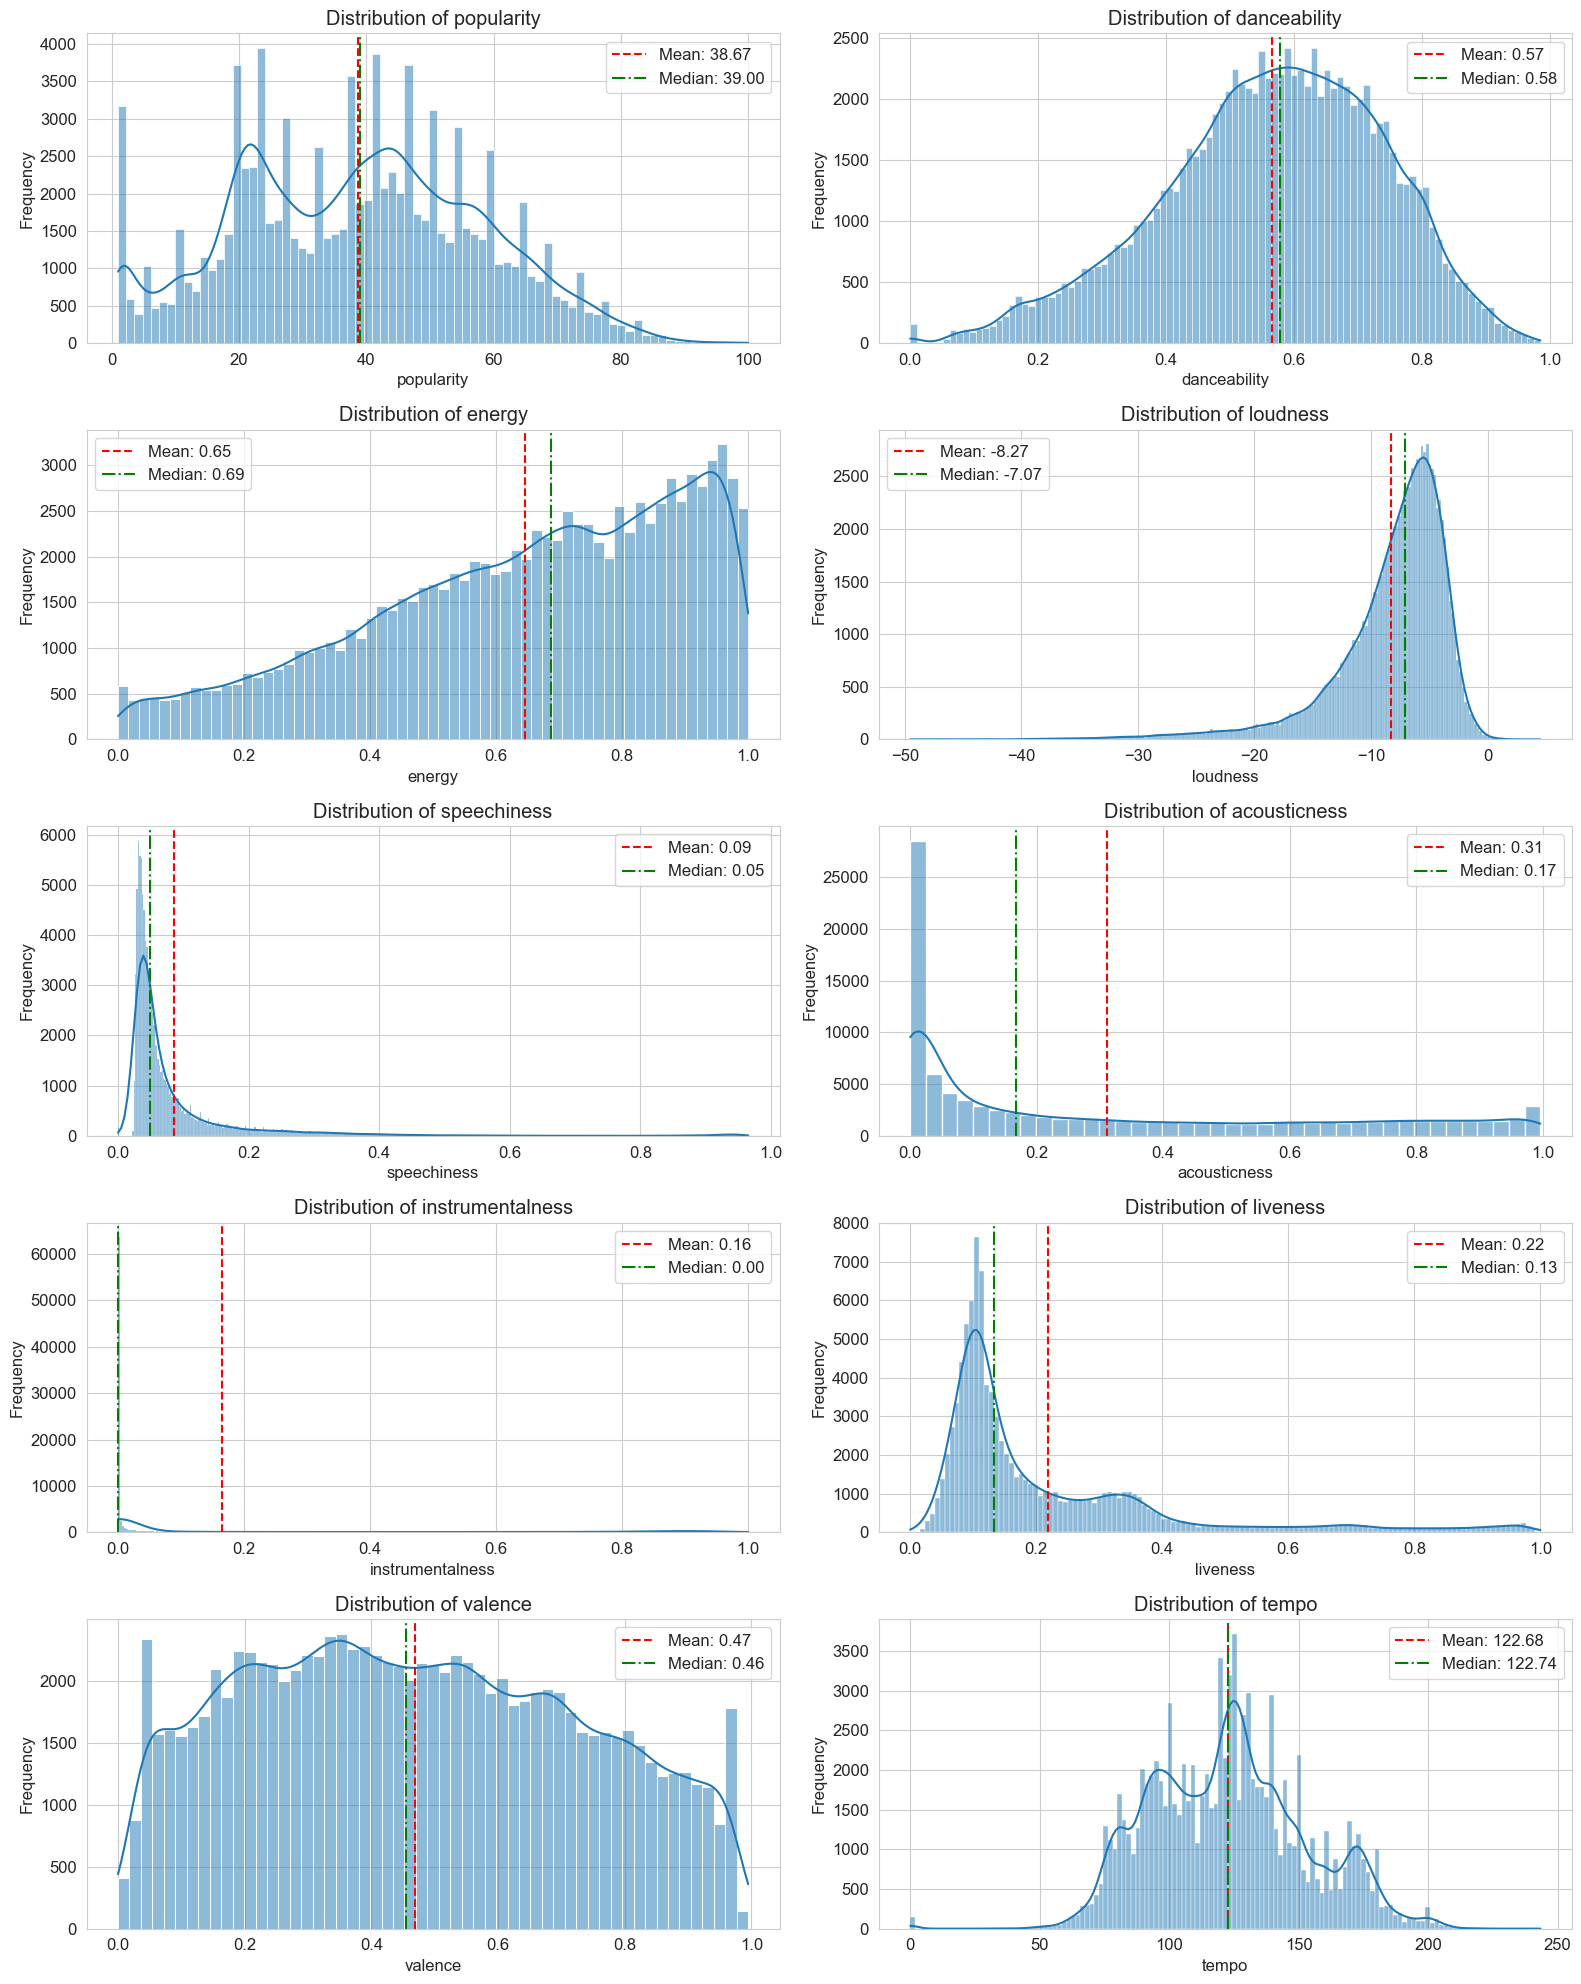

In [5]:
# Select numerical features for distribution analysis
numerical_features = ['popularity', 'danceability', 'energy', 'loudness',
                      'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 20))
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()


this initial view tells us quite a bit about each of the numeric variables. popularity looks to be bimodal, with the first peak around 20 and then another around 50. The rest are right skewed with an approximately normal distribution. danceability, valencev and tempo are more so normally distributed without skew, which can be seen as outlieres compared to the rest of the variables


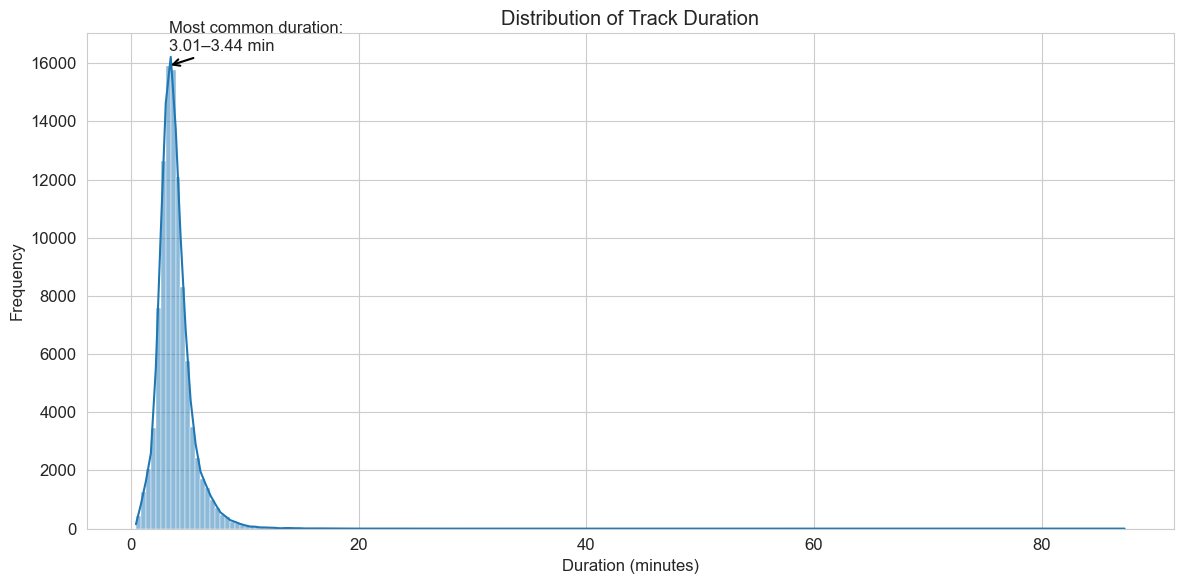

In [6]:
df.loc[:, 'duration_min'] = df['duration_ms'] / 60000

# Histogram of track durations with an in-axes annotation
plt.figure(figsize=(12, 6))

# Save the returned Axes so we can annotate *that* object
ax = sns.histplot(df['duration_min'], bins=200, kde=True)

ax.set_title('Distribution of Track Duration')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Frequency')

# ------------------------------------------------------------------
# Compute the most common 1-D histogram bin and its properties
most_common_bin = df['duration_min'].value_counts(bins=200).idxmax()

left_val  = most_common_bin.left
right_val = most_common_bin.right
mid_val   = (left_val + right_val) / 2
max_count = df['duration_min'].value_counts(bins=200).max()

ax.annotate(
    f'Most common duration:\n{left_val:.2f}–{right_val:.2f} min',
    xy=(mid_val, max_count),
    xytext=(1, 11),
    textcoords='offset points',
    ha='left',
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    zorder=10
)

plt.tight_layout()
plt.show()


From the track duration the mean time is roughly three to three and a half minutes, but there are some songs up to 95 minutes in length

## 3. Relationships Between Variables

This is one of the most basic graphs I use when training any machine learning model, and for good reason, it is a great way to see the correlation between variables, this can help uncover colinearity within the data, although 'newer' models like random forest are resilient to colinearity unlike older models.


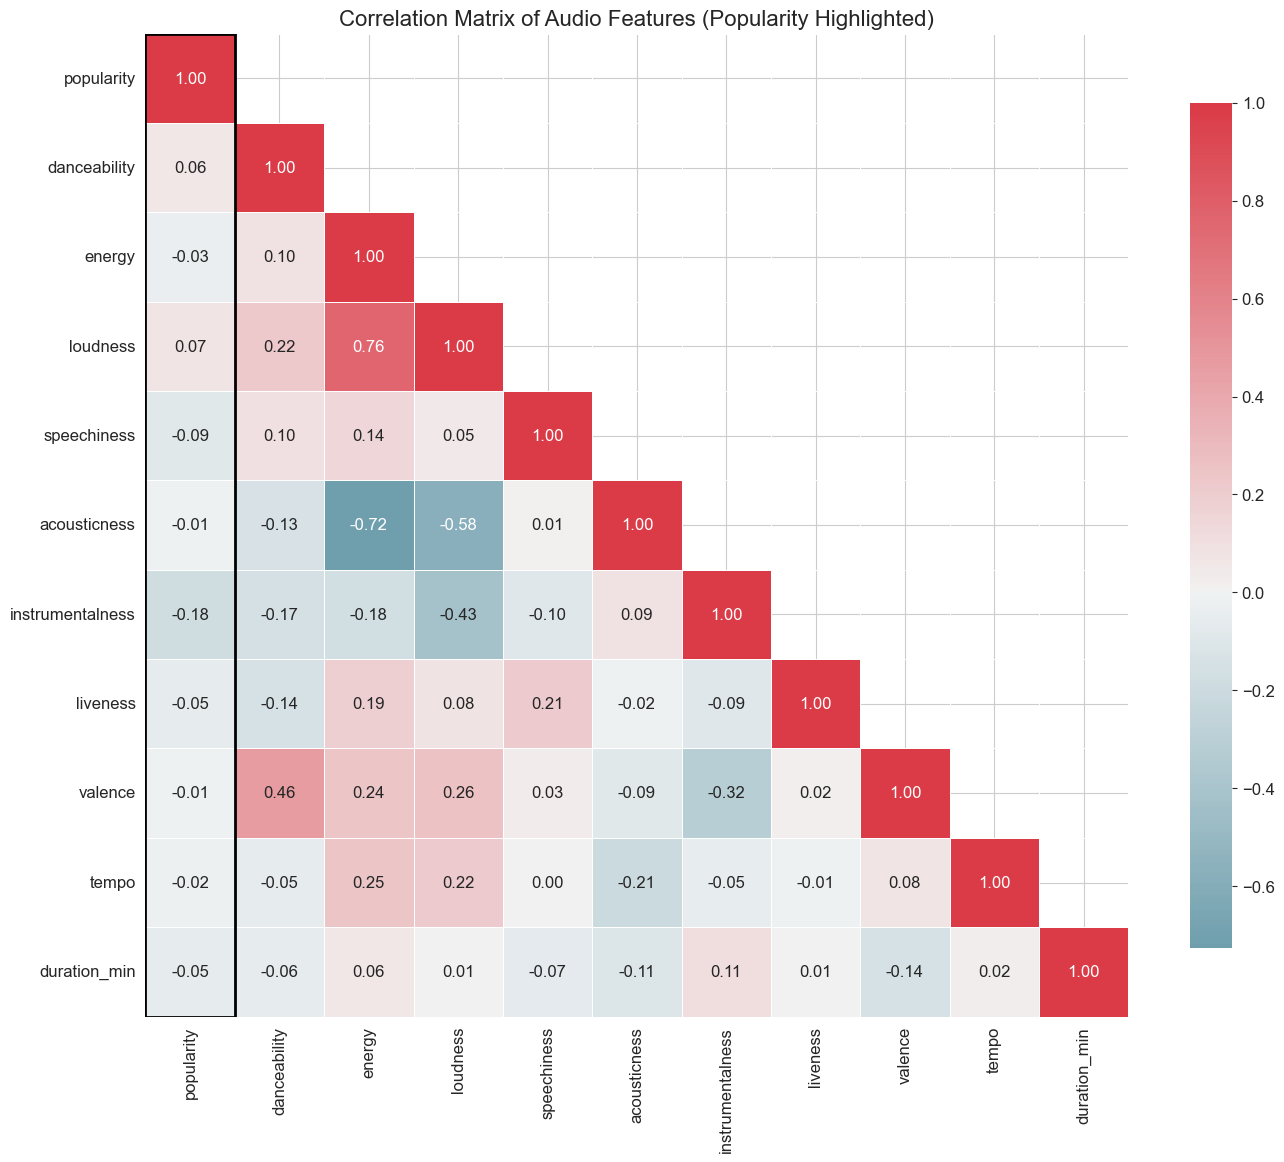

C:\Users\Ben Funk\AppData\Local\Temp\ipykernel_9360\1282862771.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_with_popularity.index, y=corr_with_popularity.values, palette=colors)


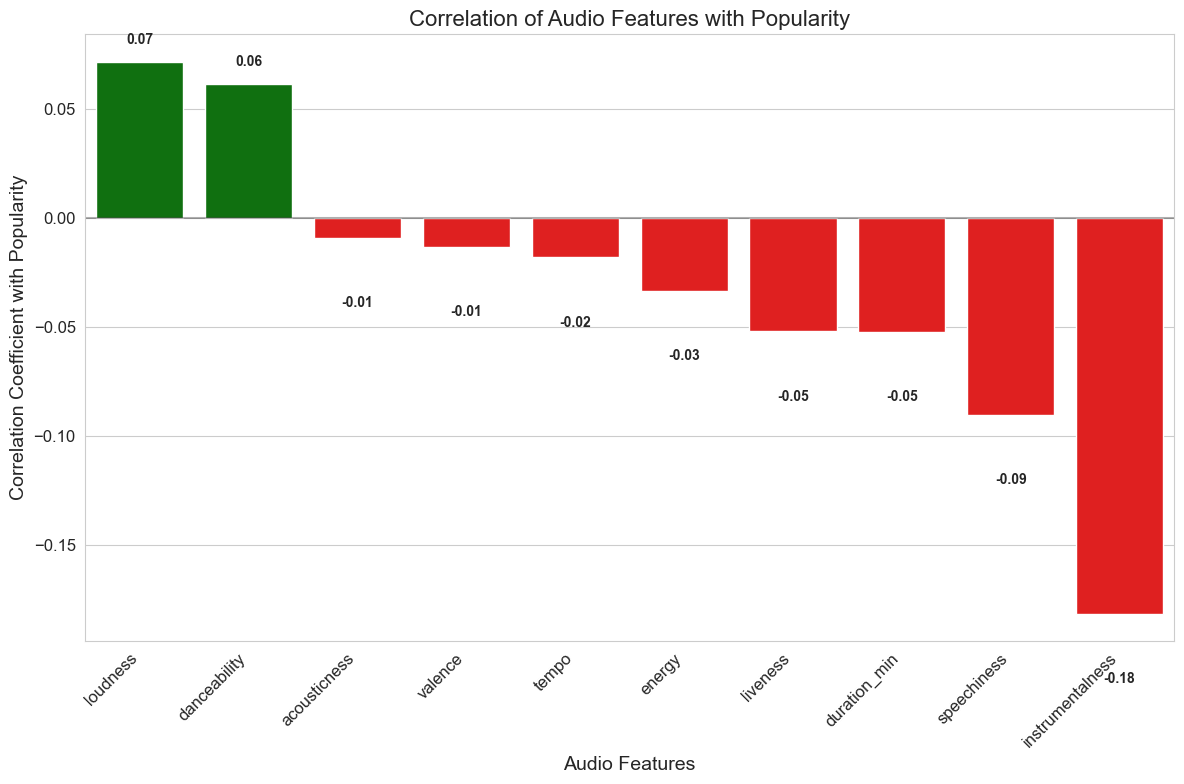

In [7]:
# Select features that might influence popularity
popularity_corr_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 
                           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min']

# Calculate correlation with popularity
corr_with_popularity = df[popularity_corr_features].corr()['popularity'].sort_values(ascending=False)

# Create a correlation matrix
corr_matrix = df[popularity_corr_features].corr()

# Plot the correlation matrix with popularity highlighted
plt.figure(figsize=(14, 12))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask, k=1)] = True  # Keep only lower triangle

# Use a custom colormap that emphasizes correlations with popularity
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap with popularity row/column highlighted
g = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, 
          fmt='.2f', linewidths=0.5, square=True, center=0,
          cbar_kws={"shrink": .8})

# Highlight the popularity row and column
for i in range(len(popularity_corr_features)):
    if popularity_corr_features[i] == 'popularity':
        # Highlight the popularity column
        g.add_patch(plt.Rectangle((i, 0), 1, len(popularity_corr_features),
                                 fill=False, edgecolor='black', lw=2))

plt.title('Correlation Matrix of Audio Features (Popularity Highlighted)', fontsize=16)
plt.tight_layout()
plt.show()

# Create a bar plot of correlations with popularity
plt.figure(figsize=(12, 8))
corr_with_popularity = corr_with_popularity.drop('popularity')  # Remove self-correlation
colors = ['green' if x > 0 else 'red' for x in corr_with_popularity]

ax = sns.barplot(x=corr_with_popularity.index, y=corr_with_popularity.values, palette=colors)
plt.title('Correlation of Audio Features with Popularity', fontsize=16)
plt.xlabel('Audio Features', fontsize=14)
plt.ylabel('Correlation Coefficient with Popularity', fontsize=14)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Add correlation values on top of bars
for i, v in enumerate(corr_with_popularity.values):
    ax.text(i, v + (0.01 if v >= 0 else -0.03), f'{v:.2f}', 
            ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


One of the downsides from a correlation matrix is that numbers can sometimes be challenging to put into context, so the secondary graph breaks down the highlighted column into a bar chart

1. **Loudness** shows the strongest positive correlation with popularity, suggesting that louder tracks tend to be more popular.
2. **danceability** also has a positive correlation with popularity, indicating that dancing songs are generally more popular.
3. **Speechiness** and **instrumentalness** show negative correlations with popularity, suggesting that more words and instrumental tracks tend to be less popular.
4. The correlations are not extremely strong (mostly below 0.3), indicating that popularity is influenced by a complex combination of factors beyond just audio characteristics.

To see these relationships in more detail I am going to plot a subset with a pairplot focused on popularity. 

_(I may have gone overboard and this next cell takes around 30 seconds)_


<Figure size 1200x1000 with 0 Axes>

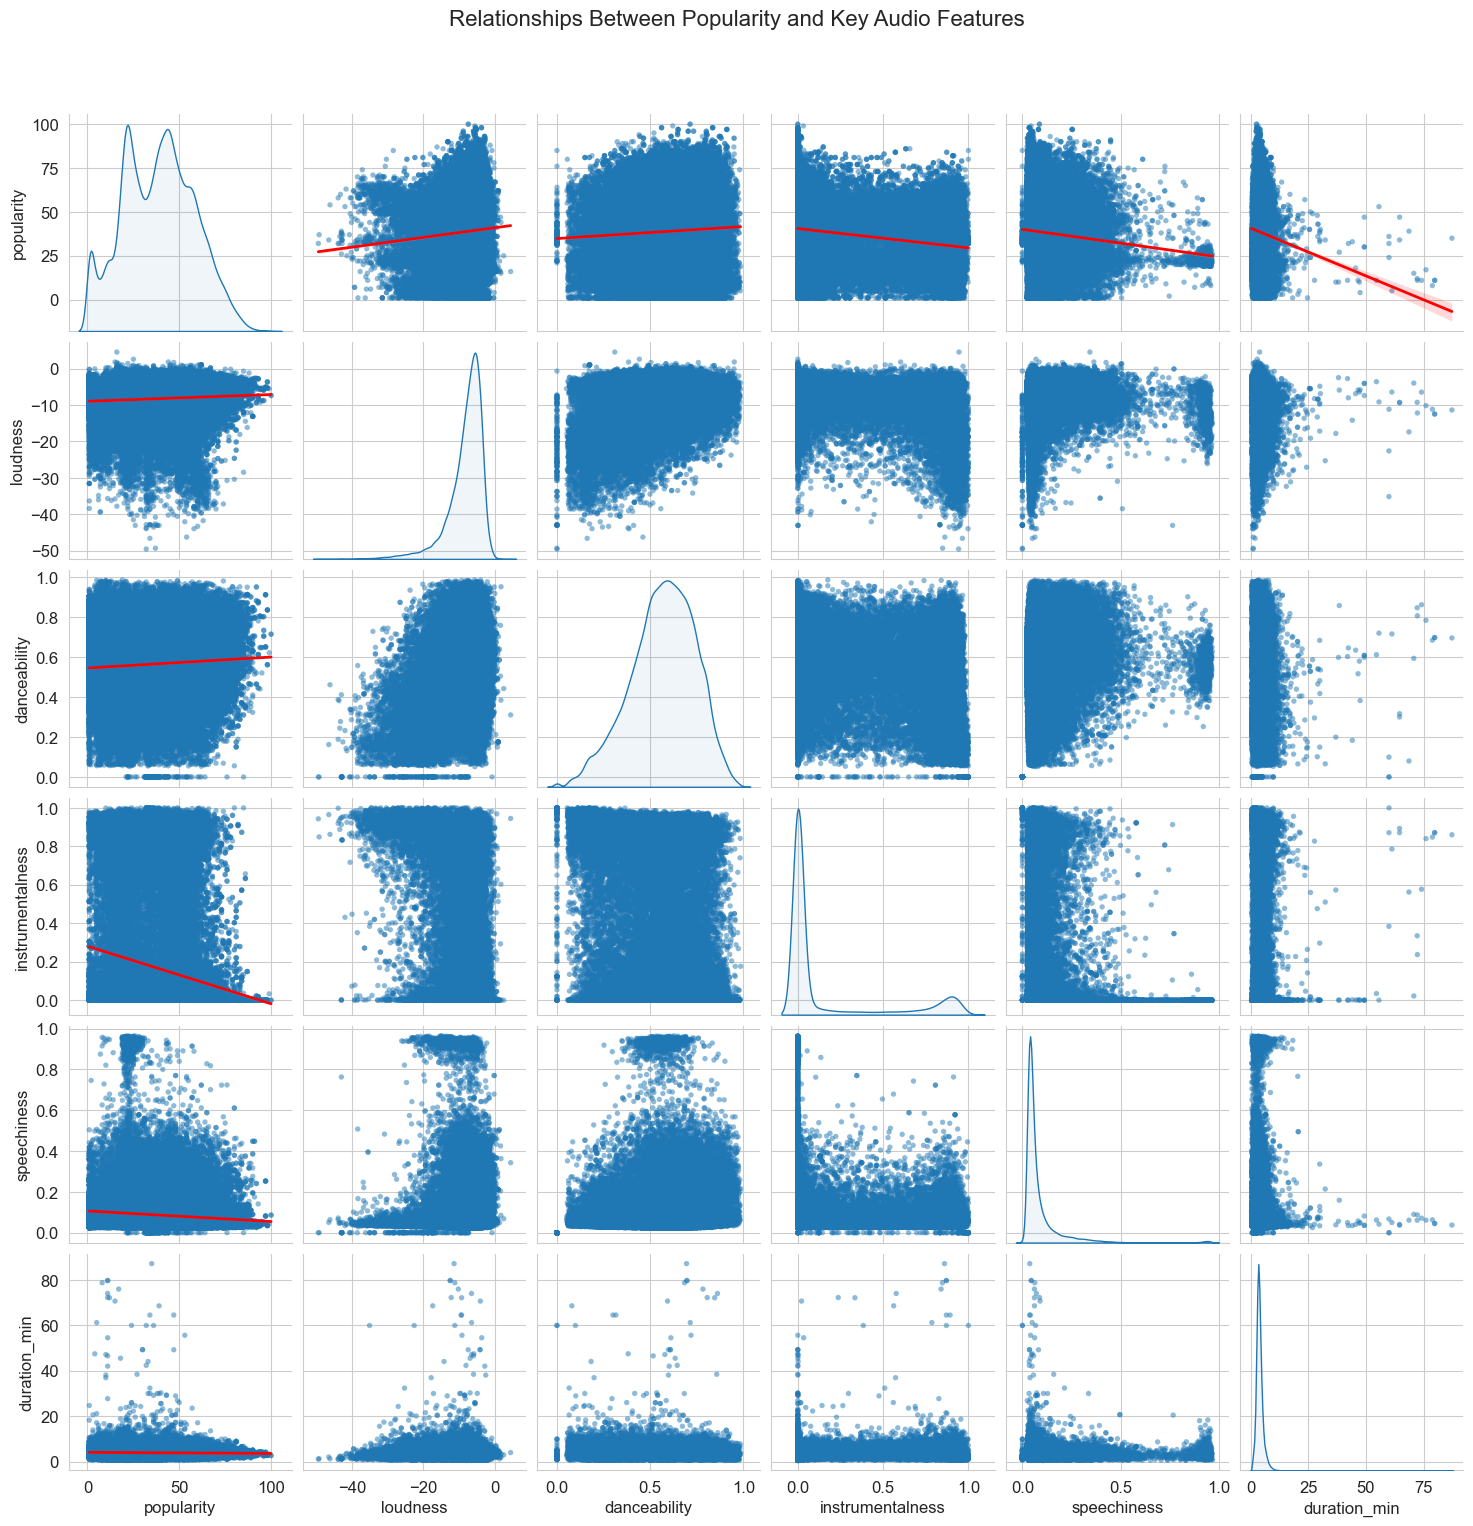

In [8]:
# Select the most important features based on correlation with popularity
top_corr_features = ['popularity']
# Add top 2 positive correlations
top_positive = corr_with_popularity[corr_with_popularity > 0].nlargest(3).index.tolist()
# Add top 2 negative correlations
top_negative = corr_with_popularity[corr_with_popularity < 0].nsmallest(3).index.tolist()

# Combine the features
important_features = top_corr_features + top_positive + top_negative

# Create a pairplot with popularity as the hue variable
plt.figure(figsize=(12, 10))
g = sns.pairplot(
    df, 
    vars=important_features,
    plot_kws=dict(alpha=0.5, s=15, edgecolor='none'),
    diag_kind='kde',  # Use KDE plots for diagonal
    diag_kws=dict(alpha=0.07)
)

# Customize the plot
g.fig.suptitle('Relationships Between Popularity and Key Audio Features', y=1.02, fontsize=16)
g.fig.subplots_adjust(top=0.95)

# Add a descriptive annotation
for i, feature1 in enumerate(important_features):
    for j, feature2 in enumerate(important_features):
        if i != j:  # Skip diagonal
            ax = g.axes[i, j]
            if feature1 == 'popularity' or feature2 == 'popularity':
                # Add trend line for plots involving popularity
                sns.regplot(x=feature2, y=feature1, data=df, ax=ax, 
                           scatter=False, line_kws={"color": "red", "lw": 2})

plt.show()


This gives a good impression that the relationship between popularity and the other explanatory data is much more complicated than just a linear one.
As one final Item I created a radar plot to show the difference between 3 popularity areas
I feel like this covers everything with the quantitative analysis, however there are still some qualitative variables which might have different relationships to the popularity.

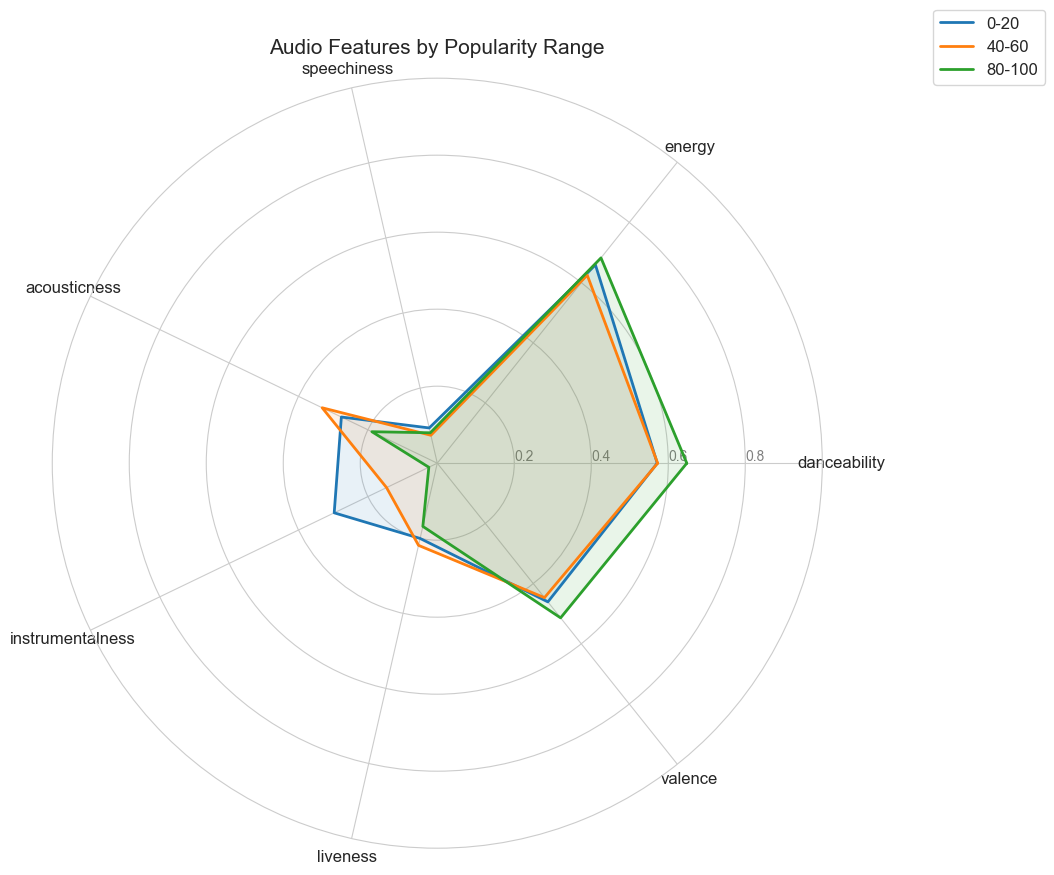

In [9]:
# Create specific popularity bins as requested: 0-10, 20-30, 50-60, 70-80, 90-100 (inclusive)
def assign_bin(popularity):
    if 0 <= popularity <= 20:
        return '0-20'
    elif 40 <= popularity <= 60:
        return '40-60'
    elif 80 <= popularity <= 100:
        return '80-100'
    else:
        return None


df['popularity_bin'] = df['popularity'].apply(assign_bin)

# Filter out tracks that don't fall into any of the specified bins
df_filtered = df[df['popularity_bin'].notna()]

# Select features for the radar chart
radar_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Calculate the mean of each feature for each popularity bin
radar_data = df_filtered.groupby('popularity_bin')[radar_features].mean()

# Number of variables
N = len(radar_features)

# Create angles for each feature
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], radar_features, size=12)

# Draw the y-axis labels (0-1)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ['0.2', '0.4', '0.6', '0.8'], color='grey', size=10)
plt.ylim(0, 1)

# Plot each popularity bin in the specified order
for pop_bin in radar_data.index:
    values = radar_data.loc[pop_bin].values.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=str(pop_bin))
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Audio Features by Popularity Range', size=15)

plt.show()

## 4. Analysis by Genre

For this I am going to plot the popularity as a box plot for each song genre. This will allow us to see what the popularity spread is within a genre as well as compare different genres together.


C:\Users\Ben Funk\AppData\Local\Temp\ipykernel_9360\1004322984.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='track_genre', y='popularity', data=df_sorted_genres, palette='viridis')


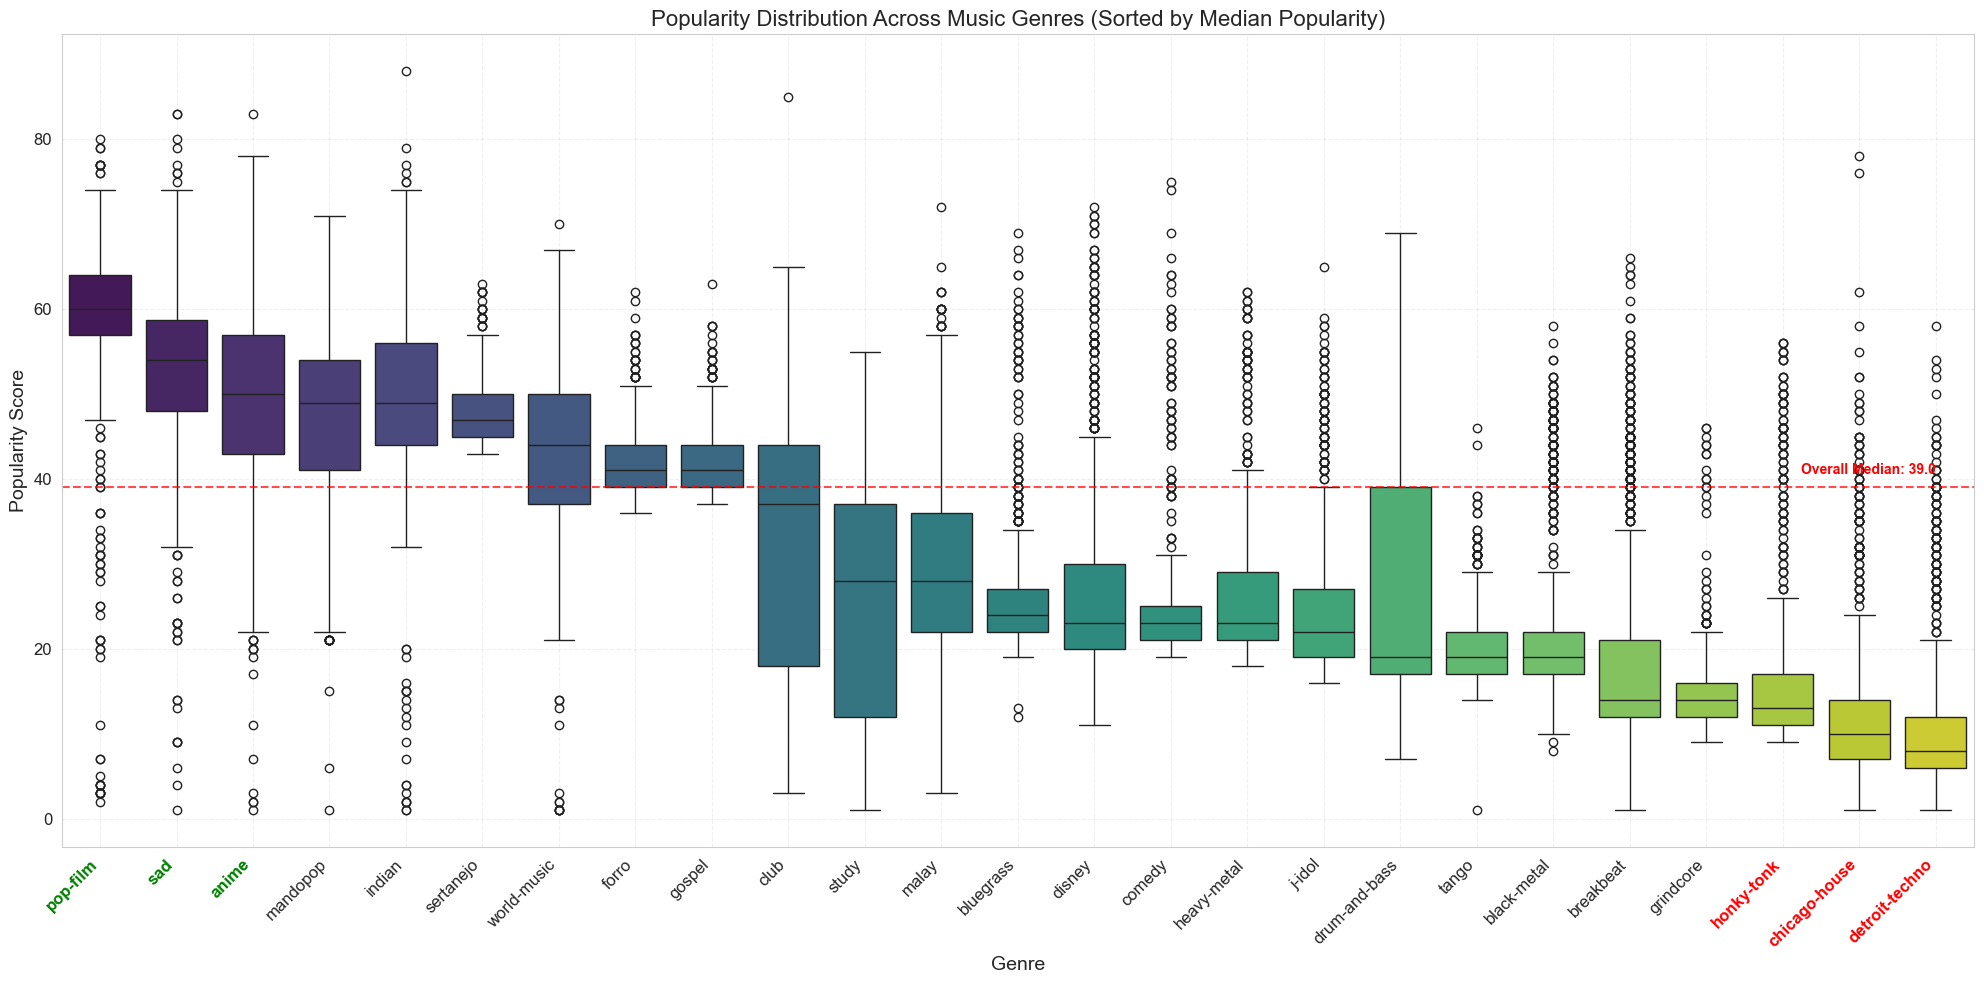

In [10]:
# Get the top 25 genres by frequency
top_genres = df['track_genre'].value_counts().head(25).index.tolist()

# Filter the dataframe to include only the top genres
df_top_genres = df[df['track_genre'].isin(top_genres)]

# Create a figure focusing solely on popularity by genre (sorted by median popularity)
plt.figure(figsize=(20, 10))

# Sort genres by median popularity
genre_popularity_median = df_top_genres.groupby('track_genre')['popularity'].median().sort_values(ascending=False)
sorted_genres = genre_popularity_median.index.tolist()

# Create a new dataframe with genres in the sorted order
df_sorted_genres = df[df['track_genre'].isin(sorted_genres)].copy()
df_sorted_genres['track_genre'] = pd.Categorical(df_sorted_genres['track_genre'], categories=sorted_genres, ordered=True)

# Create the boxplot with sorted genres
ax = sns.boxplot(x='track_genre', y='popularity', data=df_sorted_genres, palette='viridis')
ax.set_title('Popularity Distribution Across Music Genres (Sorted by Median Popularity)', fontsize=16)
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Popularity Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)

# Add a horizontal line for the overall median popularity
overall_median = df['popularity'].median()
plt.axhline(y=overall_median, color='red', linestyle='--', alpha=0.7)
plt.text(len(sorted_genres)-1, overall_median + 2, f'Overall Median: {overall_median:.1f}', 
         ha='right', va='center', fontsize=10, color='red', fontweight='bold')

# Highlight the top 3 and bottom 3 genres by median popularity
top3_genres = sorted_genres[:3]
bottom3_genres = sorted_genres[-3:]

# Add annotations for top 3 genres
for i, genre in enumerate(top3_genres):
    idx = sorted_genres.index(genre)
    ax.get_xticklabels()[idx].set_color('green')
    ax.get_xticklabels()[idx].set_fontweight('bold')

# Add annotations for bottom 3 genres
for i, genre in enumerate(bottom3_genres):
    idx = sorted_genres.index(genre)
    ax.get_xticklabels()[idx].set_color('red')
    ax.get_xticklabels()[idx].set_fontweight('bold')

plt.tight_layout()
plt.show()


This graph tells a much better story compared to the quantitative data,the median of each genre shows clear trends for popularity. Pop-Film, sad, and anime have the highest median amongst genres, with medians between 50–60. On the low end, there is honky-tonk, Chicago house, and detroit techno. These are some interesting niche subgenres wich probably only have a couple of listeners

## 5. Combining into one visual

That was a lot of graphical analysis, so to make things easier, I will combine some of those graphs into one plot. This way sharing the information becomes a lot easier to share as well as consolidate the visuals to one area for direct comparison.


C:\Users\Ben Funk\AppData\Local\Temp\ipykernel_9360\2669861310.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_genres_by_popularity.index, y=top5_genres_by_popularity.values, palette=colors, ax=ax3)
C:\Users\Ben Funk\AppData\Local\Temp\ipykernel_9360\2669861310.py:80: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top5_genres_by_popularity.index, y=top5_genres_by_popularity.values, palette=colors, ax=ax3)
C:\Users\Ben Funk\AppData\Local\Temp\ipykernel_9360\2669861310.py:101: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_mean

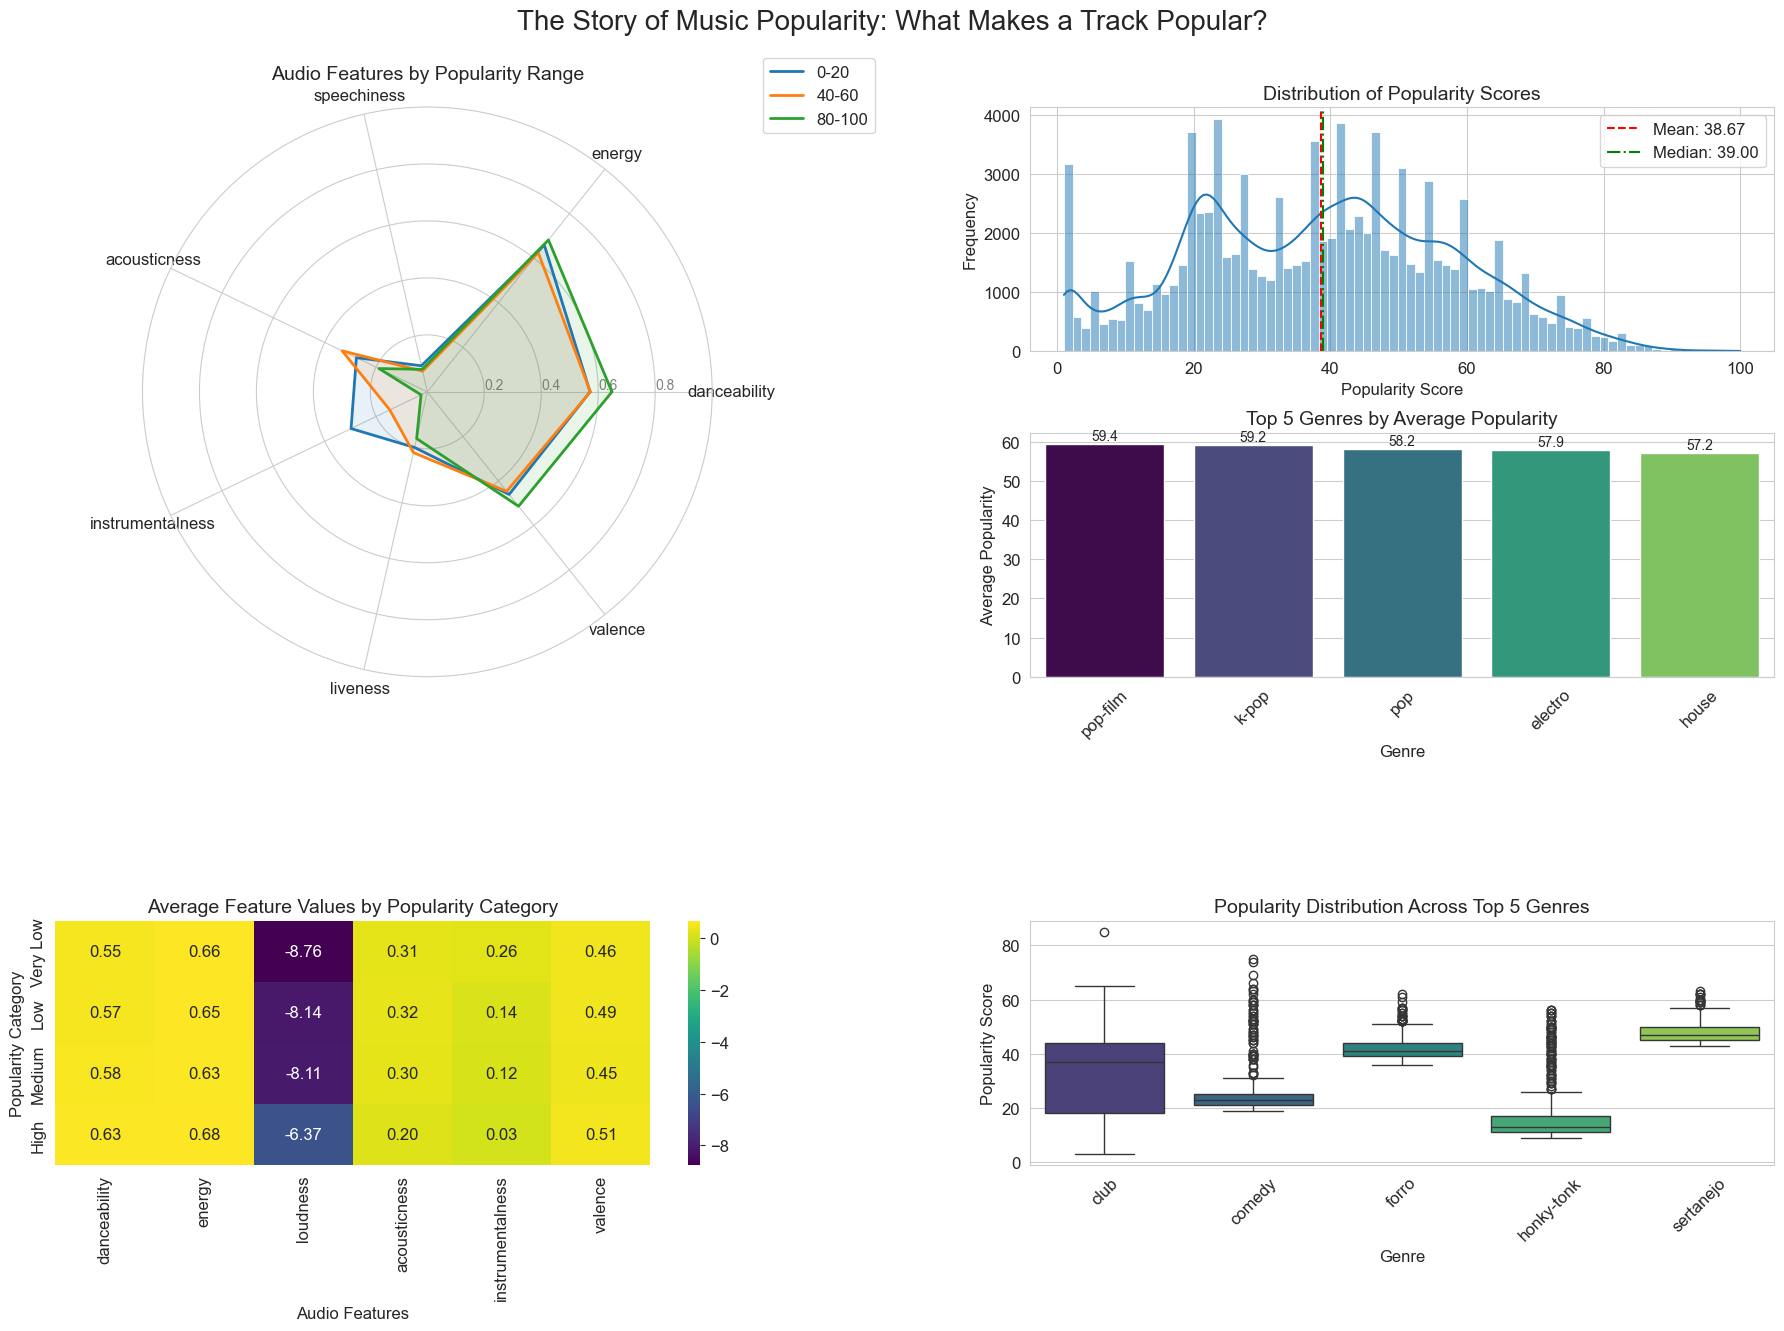

In [11]:
# Create a figure with a grid of subplots with different sizes to tell the story of popularity
fig = plt.figure(figsize=(18, 14))
fig.suptitle('The Story of Music Popularity: What Makes a Track Popular?', fontsize=20, y=0.95)

# Define grid specifications with different sized plots
gs = fig.add_gridspec(4, 4, height_ratios=[3, 3, 1, 3])

# Main plot: Radar chart showing audio features by popularity range
ax1 = fig.add_subplot(gs[0:2, 0:2], polar=True)

# Ensure we have the popularity bins defined
if 'popularity_bin' not in df.columns:
    # Create popularity bins
    def assign_bin(popularity):
        if 0 <= popularity <= 20:
            return '0-20'
        elif 40 <= popularity <= 60:
            return '40-60'
        elif 80 <= popularity <= 100:
            return '80-100'
        else:
            return None

    df['popularity_bin'] = df['popularity'].apply(assign_bin)
    df_filtered = df[df['popularity_bin'].notna()]
else:
    df_filtered = df[df['popularity_bin'].notna()]

# Select features for the radar chart
radar_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Calculate the mean of each feature for each popularity bin
radar_data = df_filtered.groupby('popularity_bin')[radar_features].mean()

# Number of variables
N = len(radar_features)

# Create angles for each feature
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Draw one axis per variable and add labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(radar_features, size=12)

# Draw the y-axis labels (0-1)
ax1.set_rlabel_position(0)
ax1.set_yticks([0.2, 0.4, 0.6, 0.8])
ax1.set_yticklabels(['0.2', '0.4', '0.6', '0.8'], color='grey', size=10)
ax1.set_ylim(0, 1)

# Plot each popularity bin
for pop_bin in radar_data.index:
    values = radar_data.loc[pop_bin].values.tolist()
    values += values[:1]  # Close the loop
    ax1.plot(angles, values, linewidth=2, linestyle='solid', label=str(pop_bin))
    ax1.fill(angles, values, alpha=0.1)

ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax1.set_title('Audio Features by Popularity Range', size=14)

# Top right: Popularity distribution histogram
ax2 = fig.add_subplot(gs[0, 2:])
sns.histplot(df['popularity'], kde=True, ax=ax2)
ax2.set_title('Distribution of Popularity Scores', fontsize=14)
ax2.set_xlabel('Popularity Score', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)

# Add mean and median lines
mean_val = df['popularity'].mean()
median_val = df['popularity'].median()
ax2.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
ax2.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
ax2.legend()

# Middle right: Top 5 genres by average popularity
ax3 = fig.add_subplot(gs[1, 2:])
top5_genres_by_popularity = df.groupby('track_genre')['popularity'].mean().nlargest(5)
colors = plt.cm.viridis(np.linspace(0, 0.8, len(top5_genres_by_popularity)))
sns.barplot(x=top5_genres_by_popularity.index, y=top5_genres_by_popularity.values, palette=colors, ax=ax3)
ax3.set_title('Top 5 Genres by Average Popularity', fontsize=14)
ax3.set_xlabel('Genre', fontsize=12)
ax3.set_ylabel('Average Popularity', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Add values on top of bars
for i, v in enumerate(top5_genres_by_popularity.values):
    ax3.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=10)

# Bottom left: Feature importance for popularity (without correlation)
ax4 = fig.add_subplot(gs[3, 0:2])

features_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence']

# Create popularity categories for better visualization
df['popularity_category'] = pd.cut(df['popularity'], 
                                  bins=[0, 25, 50, 75, 100], 
                                  labels=['Very Low', 'Low', 'Medium', 'High'])

# Calculate mean values for each feature by popularity category
feature_means = df.groupby('popularity_category')[features_to_plot].mean()

# Create a heatmap showing feature values by popularity category
sns.heatmap(feature_means, annot=True, cmap='viridis', fmt='.2f', ax=ax4)
ax4.set_title('Average Feature Values by Popularity Category', fontsize=14)
ax4.set_xlabel('Audio Features', fontsize=12)
ax4.set_ylabel('Popularity Category', fontsize=12)

# Bottom right: Boxplot of popularity by top genres
ax5 = fig.add_subplot(gs[3, 2:])

# Get the top 5 genres by frequency for a cleaner visualization
top5_genres = df['track_genre'].value_counts().head(5).index.tolist()
df_top5_genres = df[df['track_genre'].isin(top5_genres)]

# Create the boxplot
sns.boxplot(x='track_genre', y='popularity', data=df_top5_genres, palette='viridis', ax=ax5)
ax5.set_title('Popularity Distribution Across Top 5 Genres', fontsize=14)
ax5.set_xlabel('Genre', fontsize=12)
ax5.set_ylabel('Popularity Score', fontsize=12)
ax5.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4)
plt.show()
